# NLP EDA
How do we quantify our text data?

- Word frequency
- ngrams
- word cloud
- other common features, text data
- (maybe) sentiment analysis

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import nltk.sentiment

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
plt.rc('figure', figsize=(16,8))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('spam_clean.csv')
print(df.shape)

(5572, 2)


In [4]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

What are the most frequent words + phrases in the entire dataset, spam messages, and ham messages?

In [6]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

In [7]:
pd.Series(all_words).value_counts()

call                     600
im                       471
get                      397
ur                       384
go                       304
                        ... 
yuou                       1
ujhhhhhhh                  1
700                        1
prizeawaiting              1
wwwsmsacubootydelious      1
Length: 8821, dtype: int64

In [8]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [9]:
spam_freq

call                     359
free                     216
txt                      150
ur                       144
text                     137
                        ... 
88800                      1
poboxox36504w45wq          1
07801543489                1
simple                     1
wwwsmsacubootydelious      1
Length: 2783, dtype: int64

In [10]:
ham_freq

im             458
get            314
go             273
ok             272
dont           268
              ... 
dial             1
cheyyamoand      1
yagoing          1
prem             1
youuuuu          1
Length: 6935, dtype: int64

In [11]:
word_counts = pd.concat([
    all_freq, 
    ham_freq,
    spam_freq,
    ], axis=1)
word_counts = word_counts.fillna(0).astype(int)
word_counts.columns = ['all', 'ham', 'spam']
word_counts

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
...,...,...,...
zoe,2,1,1
zogtorius,1,1,0
zoom,1,1,0
zouk,1,0,1


In [12]:
word_counts.spam.sort_values().tail(15)

new         69
service     72
tone        73
get         83
prize       94
reply      102
stop       113
claim      115
4          119
mobile     135
text       137
ur         144
txt        150
free       216
call       359
Name: spam, dtype: int64

In [13]:
word_counts.ham.sort_values().tail(15)

time    213
day     214
good    223
got     231
like    232
ur      240
ill     240
know    241
call    241
come    242
dont    268
ok      272
go      273
get     314
im      458
Name: ham, dtype: int64

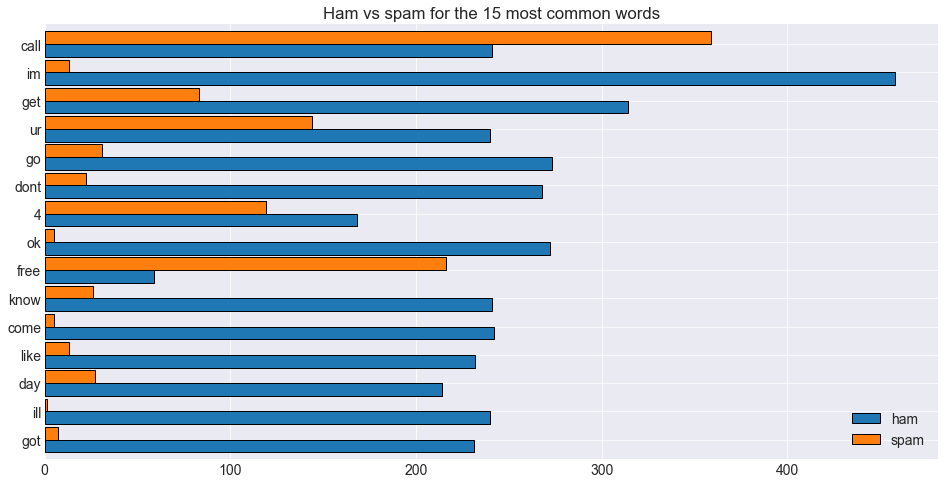

In [14]:
most_common_words = word_counts.sort_values(by='all').tail(15)
most_common_words.drop(columns='all').plot.barh(width=.9, ec='black', title='Ham vs spam for the 15 most common words')

Let's find some representaticve messages:

In [15]:
df.text.str

In [16]:
print(df[df.text.str.lower().str.contains('free')].head(1).text[2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [17]:
print(df[df.text.str.lower().str.contains('call')].text[8])

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


What are the most common phrases?

**ngram**: a combination of n words at a time

**bigram**: 2 words at a time

In [18]:
list(nltk.bigrams('Curie is set to graduate in about 6 weeks.'.split()))

[('Curie', 'is'),
 ('is', 'set'),
 ('set', 'to'),
 ('to', 'graduate'),
 ('graduate', 'in'),
 ('in', 'about'),
 ('about', '6'),
 ('6', 'weeks.')]

In [19]:
list(nltk.ngrams('Curie is set to graduate in about 6 weeks.'.split(), 3))

[('Curie', 'is', 'set'),
 ('is', 'set', 'to'),
 ('set', 'to', 'graduate'),
 ('to', 'graduate', 'in'),
 ('graduate', 'in', 'about'),
 ('in', 'about', '6'),
 ('about', '6', 'weeks.')]

In [20]:
pd.Series(nltk.bigrams(all_words)).value_counts()

(please, call)        53
(call, later)         52
(ill, call)           48
(let, know)           42
(dont, know)          39
                      ..
(hope, doesnt)         1
(smoke, determine)     1
(battery, hont)        1
(wear, nudist)         1
(telling, pls)         1
Length: 37441, dtype: int64

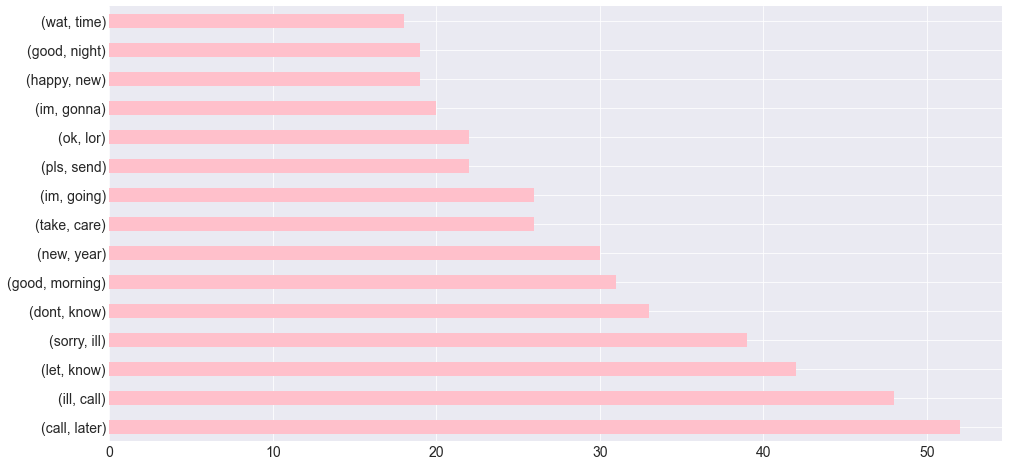

In [21]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(color='pink')

In [22]:
print(df[df.text.str.lower().str.contains('happy new')].text[764])

Wishing you and your family Merry \X\" mas and HAPPY NEW Year in advance.."


## Word cloud

Putting a bunch of words in an image, the size of the word indicates how frequently the word appears.

```
python -m pip install wordcloud```

(-0.5, 1199.5, 899.5, -0.5)

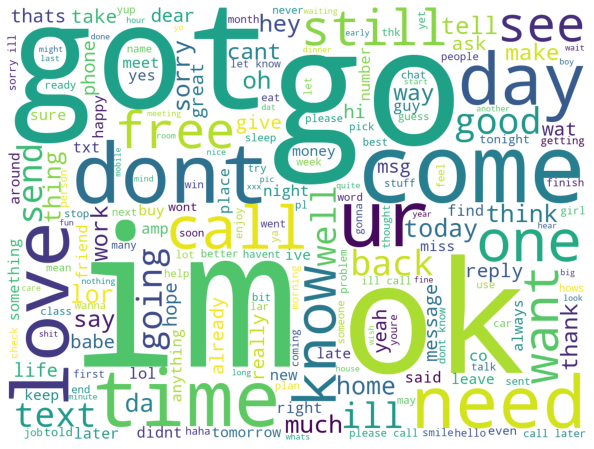

In [23]:
from wordcloud import WordCloud

text = ' '.join(all_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

## Other common Features

- Domain Specific (# of retweets on twitter, or upvotes on reddit)
- Character count
- word count
- sentence count

In [24]:
df['ch_count'] = df.text.apply(len)

In [25]:
df['word_count'] = df.text.apply(clean).apply(len)

In [26]:
nltk.sent_tokenize('Curie is a great cohort! Today is Friday.. it\'s almost the weekend!')


['Curie is a great cohort!', "Today is Friday.. it's almost the weekend!"]

In [27]:
df['sentence_count'] = df.text.apply(nltk.sent_tokenize).apply(len)

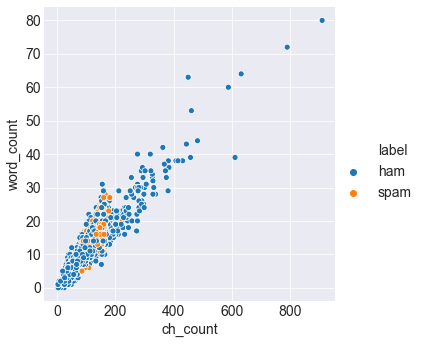

In [28]:
sns.relplot(data=df, y='word_count', x='ch_count', hue='label')

In [29]:
df.groupby('label').median()

,ch_count,word_count,sentence_count
label,,,
ham,52,6,1
spam,149,17,3


- unique word count
- punctuation count
- average word length
- average words per sentence
- lots of room for creativity here! with engineering your word features

## Sentiment Analysis

- Is this text generally positive or generally negative?
- Statistical + knowledge based approach
- [Vader Sentiment Analyzer](

In [30]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [31]:
sia.polarity_scores('This food is bad')

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [32]:
sia.polarity_scores('This food is not bad')

{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.431}

In [34]:
sia.polarity_scores('This food is the shit')

{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6124}

In [33]:
sia.polarity_scores('This food is covered in the shit')

{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.6124}

In [36]:
df['sentiment'] = df.text.apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [37]:
df.groupby('label').sentiment.mean()

label
ham     0.152262
spam    0.436018
Name: sentiment, dtype: float64

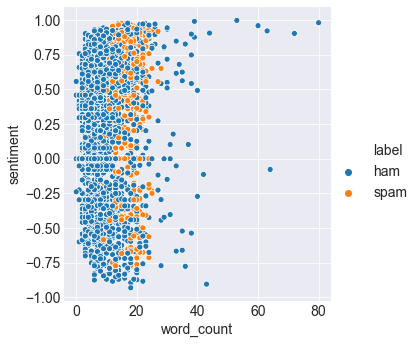

In [40]:
sns.relplot(data=df, x='word_count', y='sentiment', hue='label')

In [43]:
df['multisentence'] = df.sentence_count > 1

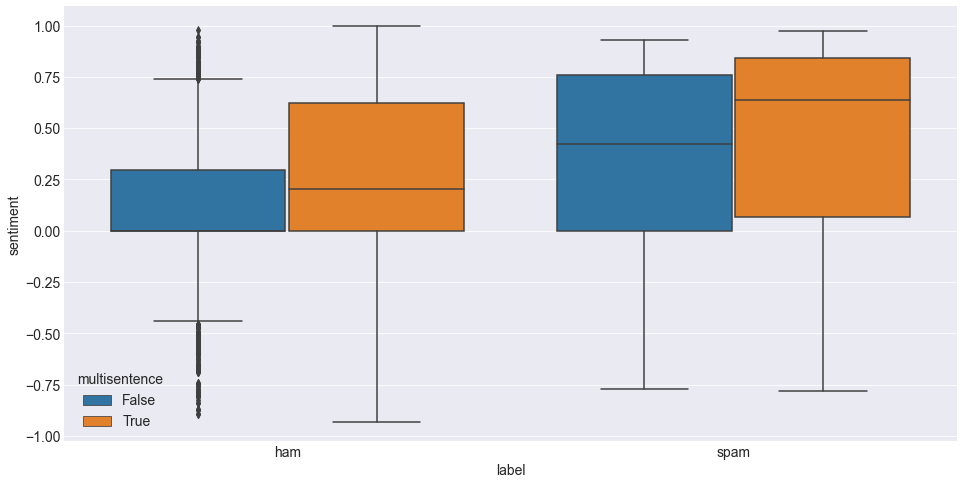

In [45]:
sns.boxplot(data=df, y='sentiment', x='label', hue='multisentence')